# **PARKINSON DISEASE PREDICTION**

# ***Voice Features - Random Forest***

In [2]:
#Data Loading

import numpy as np
import pandas as pd
df = pd.read_csv('./voice_data.txt')

In [3]:
# finding number of rows and columns
df.shape
#Show first 5 rows of the dataset
df.head()
# Display basic information about the dataset
print(df.info())
# Check for any missing values in the entire dataset
print(df.isnull().sum().sum())
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            1039 non-null   int64  
 1   1.488        1039 non-null   float64
 2   0.000090213  1039 non-null   float64
 3   0.9          1039 non-null   float64
 4   0.794        1039 non-null   float64
 5   2.699        1039 non-null   float64
 6   8.334        1039 non-null   float64
 7   0.779        1039 non-null   float64
 8   4.517        1039 non-null   float64
 9   4.609        1039 non-null   float64
 10  6.802        1039 non-null   float64
 11  13.551       1039 non-null   float64
 12  0.905905     1039 non-null   float64
 13  0.119116     1039 non-null   float64
 14  11.13        1039 non-null   float64
 15  166.533      1039 non-null   float64
 16  164.781      1039 non-null   float64
 17  10.421       1039 non-null   float64
 18  142.229      1039 non-null   float64
 19  187.57

In [4]:
#Define the new column names

new_column_names = [
    "Subject_ID", "Jitter(%)", "Jitter(Abs)", "Jitter(RAP)", "Jitter(PPQ5)",
    "Jitter(DDP)", "Shimmer(%)", "Shimmer(Abs)", "Shimmer(APQ3)", "Shimmer(APQ5)",
    "Shimmer(APQ11)", "Shimmer(DD)", "Harmonicity", "NHR", "HNR",
    "MedianPitch", "MeanPitch", "StdDevPitch", "MinPitch", "MaxPitch",
    "NumPulses", "NumPeriods", "MeanPeriod", "StdDevPeriod",
    "FractionUnvoicedFrames", "NumVoiceBreaks", "DegreeVoiceBreaks",
    "UPDRS", "PD Indicator"
]
# Rename the columns using the new names
df.columns = new_column_names
# Display the updated column names
print(df.columns)
df.head()

Index(['Subject_ID', 'Jitter(%)', 'Jitter(Abs)', 'Jitter(RAP)', 'Jitter(PPQ5)',
       'Jitter(DDP)', 'Shimmer(%)', 'Shimmer(Abs)', 'Shimmer(APQ3)',
       'Shimmer(APQ5)', 'Shimmer(APQ11)', 'Shimmer(DD)', 'Harmonicity', 'NHR',
       'HNR', 'MedianPitch', 'MeanPitch', 'StdDevPitch', 'MinPitch',
       'MaxPitch', 'NumPulses', 'NumPeriods', 'MeanPeriod', 'StdDevPeriod',
       'FractionUnvoicedFrames', 'NumVoiceBreaks', 'DegreeVoiceBreaks',
       'UPDRS', 'PD Indicator'],
      dtype='object')


,Subject_ID,Jitter(%),Jitter(Abs),Jitter(RAP),Jitter(PPQ5),Jitter(DDP),Shimmer(%),Shimmer(Abs),Shimmer(APQ3),Shimmer(APQ5),...,MaxPitch,NumPulses,NumPeriods,MeanPeriod,StdDevPeriod,FractionUnvoicedFrames,NumVoiceBreaks,DegreeVoiceBreaks,UPDRS,PD Indicator
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1


/tmp/ipython-input-2909389065.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='PD Indicator', data=df, palette=["#1f77b4", "#ff7f0e"])


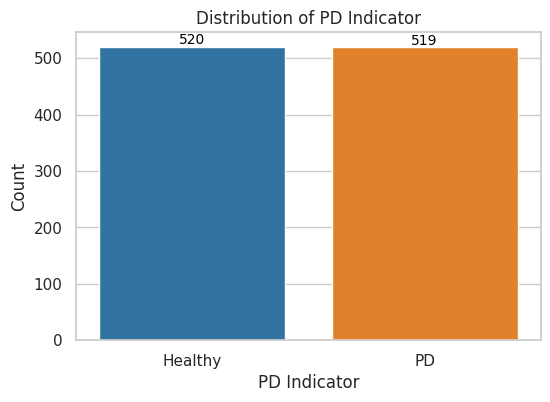

In [5]:
#Bar Diagram: PD Indicator

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='PD Indicator', data=df, palette=["#1f77b4", "#ff7f0e"])
plt.xlabel('PD Indicator')
plt.ylabel('Count')
plt.title('Distribution of PD Indicator')
plt.xticks([0, 1], ['Healthy', 'PD'])

# Adding integer count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [6]:
#Divide the dataset into two groups based on PD indicator

df1 = df[df["PD Indicator"] == 0]
df2 = df[df["PD Indicator"] == 1]
print(df1)
print(df2)
df1.shape
df2.shape
# Calculate summary statistics for the DataFrame
df1.describe()
df2.describe()

      Subject_ID  Jitter(%)  Jitter(Abs)  Jitter(RAP)  Jitter(PPQ5)  \
519           21      0.792     0.000076        0.411         0.333   
520           21      0.400     0.000038        0.204         0.228   
521           21      0.813     0.000074        0.434         0.437   
522           21      1.700     0.000172        0.789         0.929   
523           21      1.528     0.000159        0.596         0.698   
...          ...        ...          ...          ...           ...   
1034          40      5.127     0.000398        2.721         2.510   
1035          40      1.757     0.000133        0.808         0.690   
1036          40      2.912     0.000226        1.141         1.266   
1037          40      3.788     0.000275        1.786         1.484   
1038          40      1.809     0.000149        0.680         0.843   

      Jitter(DDP)  Shimmer(%)  Shimmer(Abs)  Shimmer(APQ3)  Shimmer(APQ5)  \
519         1.234       4.136         0.391          2.202          2.

,Subject_ID,Jitter(%),Jitter(Abs),Jitter(RAP),Jitter(PPQ5),Jitter(DDP),Shimmer(%),Shimmer(Abs),Shimmer(APQ3),Shimmer(APQ5),...,MaxPitch,NumPulses,NumPeriods,MeanPeriod,StdDevPeriod,FractionUnvoicedFrames,NumVoiceBreaks,DegreeVoiceBreaks,UPDRS,PD Indicator
count,519.000000,519.000000,519.000000,519.00000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,10.518304,2.854252,0.000188,1.35674,1.475903,4.070214,12.976704,1.207135,5.647055,7.880583,...,218.000007,115.813102,112.915222,0.006701,0.000801,25.172592,1.007707,10.478424,25.003854,1.0
std,5.762275,1.681113,0.000113,0.91818,1.019948,2.754580,4.710630,0.365432,2.486535,3.514261,...,109.482146,178.694055,178.532436,0.001869,0.000737,20.651862,1.470409,13.768271,14.752265,0.0
min,1.000000,0.195000,0.000010,0.06200,0.091000,0.185000,2.171000,0.229000,0.565000,1.025000,...,85.541000,0.000000,0.000000,0.002211,0.000055,0.000000,0.000000,0.000000,5.000000,1.0
25%,6.000000,1.717500,0.000105,0.75250,0.802500,2.257500,10.156500,1.000000,3.989000,5.474000,...,141.431000,42.500000,41.000000,0.005070,0.000383,5.796000,0.000000,0.000000,11.500000,1.0
50%,11.000000,2.627000,0.000169,1.17900,1.257000,3.538000,12.807000,1.226000,5.263000,7.461000,...,187.183000,67.000000,65.000000,0.006673,0.000619,23.077000,1.000000,3.324000,24.000000,1.0
75%,15.500000,3.647500,0.000258,1.78050,1.931500,5.341500,15.343500,1.406500,6.813000,9.525620,...,243.320500,111.000000,109.000000,0.007986,0.000896,38.936000,1.000000,18.738000,36.000000,1.0
max,20.000000,10.439000,0.000713,6.12500,7.205000,18.375000,41.137000,2.689000,16.641000,31.750000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,11.000000,60.298000,55.000000,1.0


In [7]:
#Central Tendencies and Difference between them
# Select the columns for comparison (excluding "Subject_ID" and "PD Indicator")
columns_to_compare = df1.columns.difference(["Subject_ID", "PD Indicator"])
# Calculate the differences between describe statistics for df2 and df1
differences = df2[columns_to_compare].describe() - df1[columns_to_compare].describe()
# Extract the desired statistics (mean, median, std, min, max) from the differences DataFrame
desired_statistics = ["mean", "50%", "std"]
differences = differences.loc[desired_statistics]
# Transpose the differences DataFrame for desired display format
differences = differences.transpose()
differences

# Display the differences
print("Differences between central tendencies of df2 and df1:")
print(differences)
# Calculate the absolute differences
absolute_differences = differences.abs()

# Sort the absolute differences DataFrame by mean values in descending order
sorted_absolute_differences = absolute_differences.sort_values(by=["mean"], ascending=False)

# Get the indices of the top 10 absolute differences
top_10_indices = sorted_absolute_differences.head(10).index

# Display the top 10 absolute differences with the original sign
print("Top 10 Absolute Differences between central tendencies \n of df2 and df1 by Mean:")
print(differences.loc[top_10_indices])

Differences between central tendencies of df2 and df1:
                             mean        50%        std
DegreeVoiceBreaks       -3.803388  -5.539500  -2.463653
FractionUnvoicedFrames  -5.068937  -6.915000  -0.342389
HNR                      0.345644   0.164000  -0.754235
Harmonicity              0.013792   0.001922  -0.021638
Jitter(%)                0.346830   0.413000  -0.150057
Jitter(Abs)              0.000036   0.000035   0.000017
Jitter(DDP)              0.655467   0.818000  -0.326868
Jitter(PPQ5)             0.253841   0.289500  -0.214893
Jitter(RAP)              0.218496   0.272000  -0.108944
MaxPitch               -33.810474 -14.881500 -21.029639
MeanPeriod               0.000308   0.000526  -0.000003
MeanPitch              -11.558032 -12.088500 -13.053128
MedianPitch             -9.447163  -9.584000 -16.707123
MinPitch                -5.580112  -4.440500  -7.840752
NHR                     -0.022813  -0.001475  -0.037903
NumPeriods              13.980606   6.500000  65.

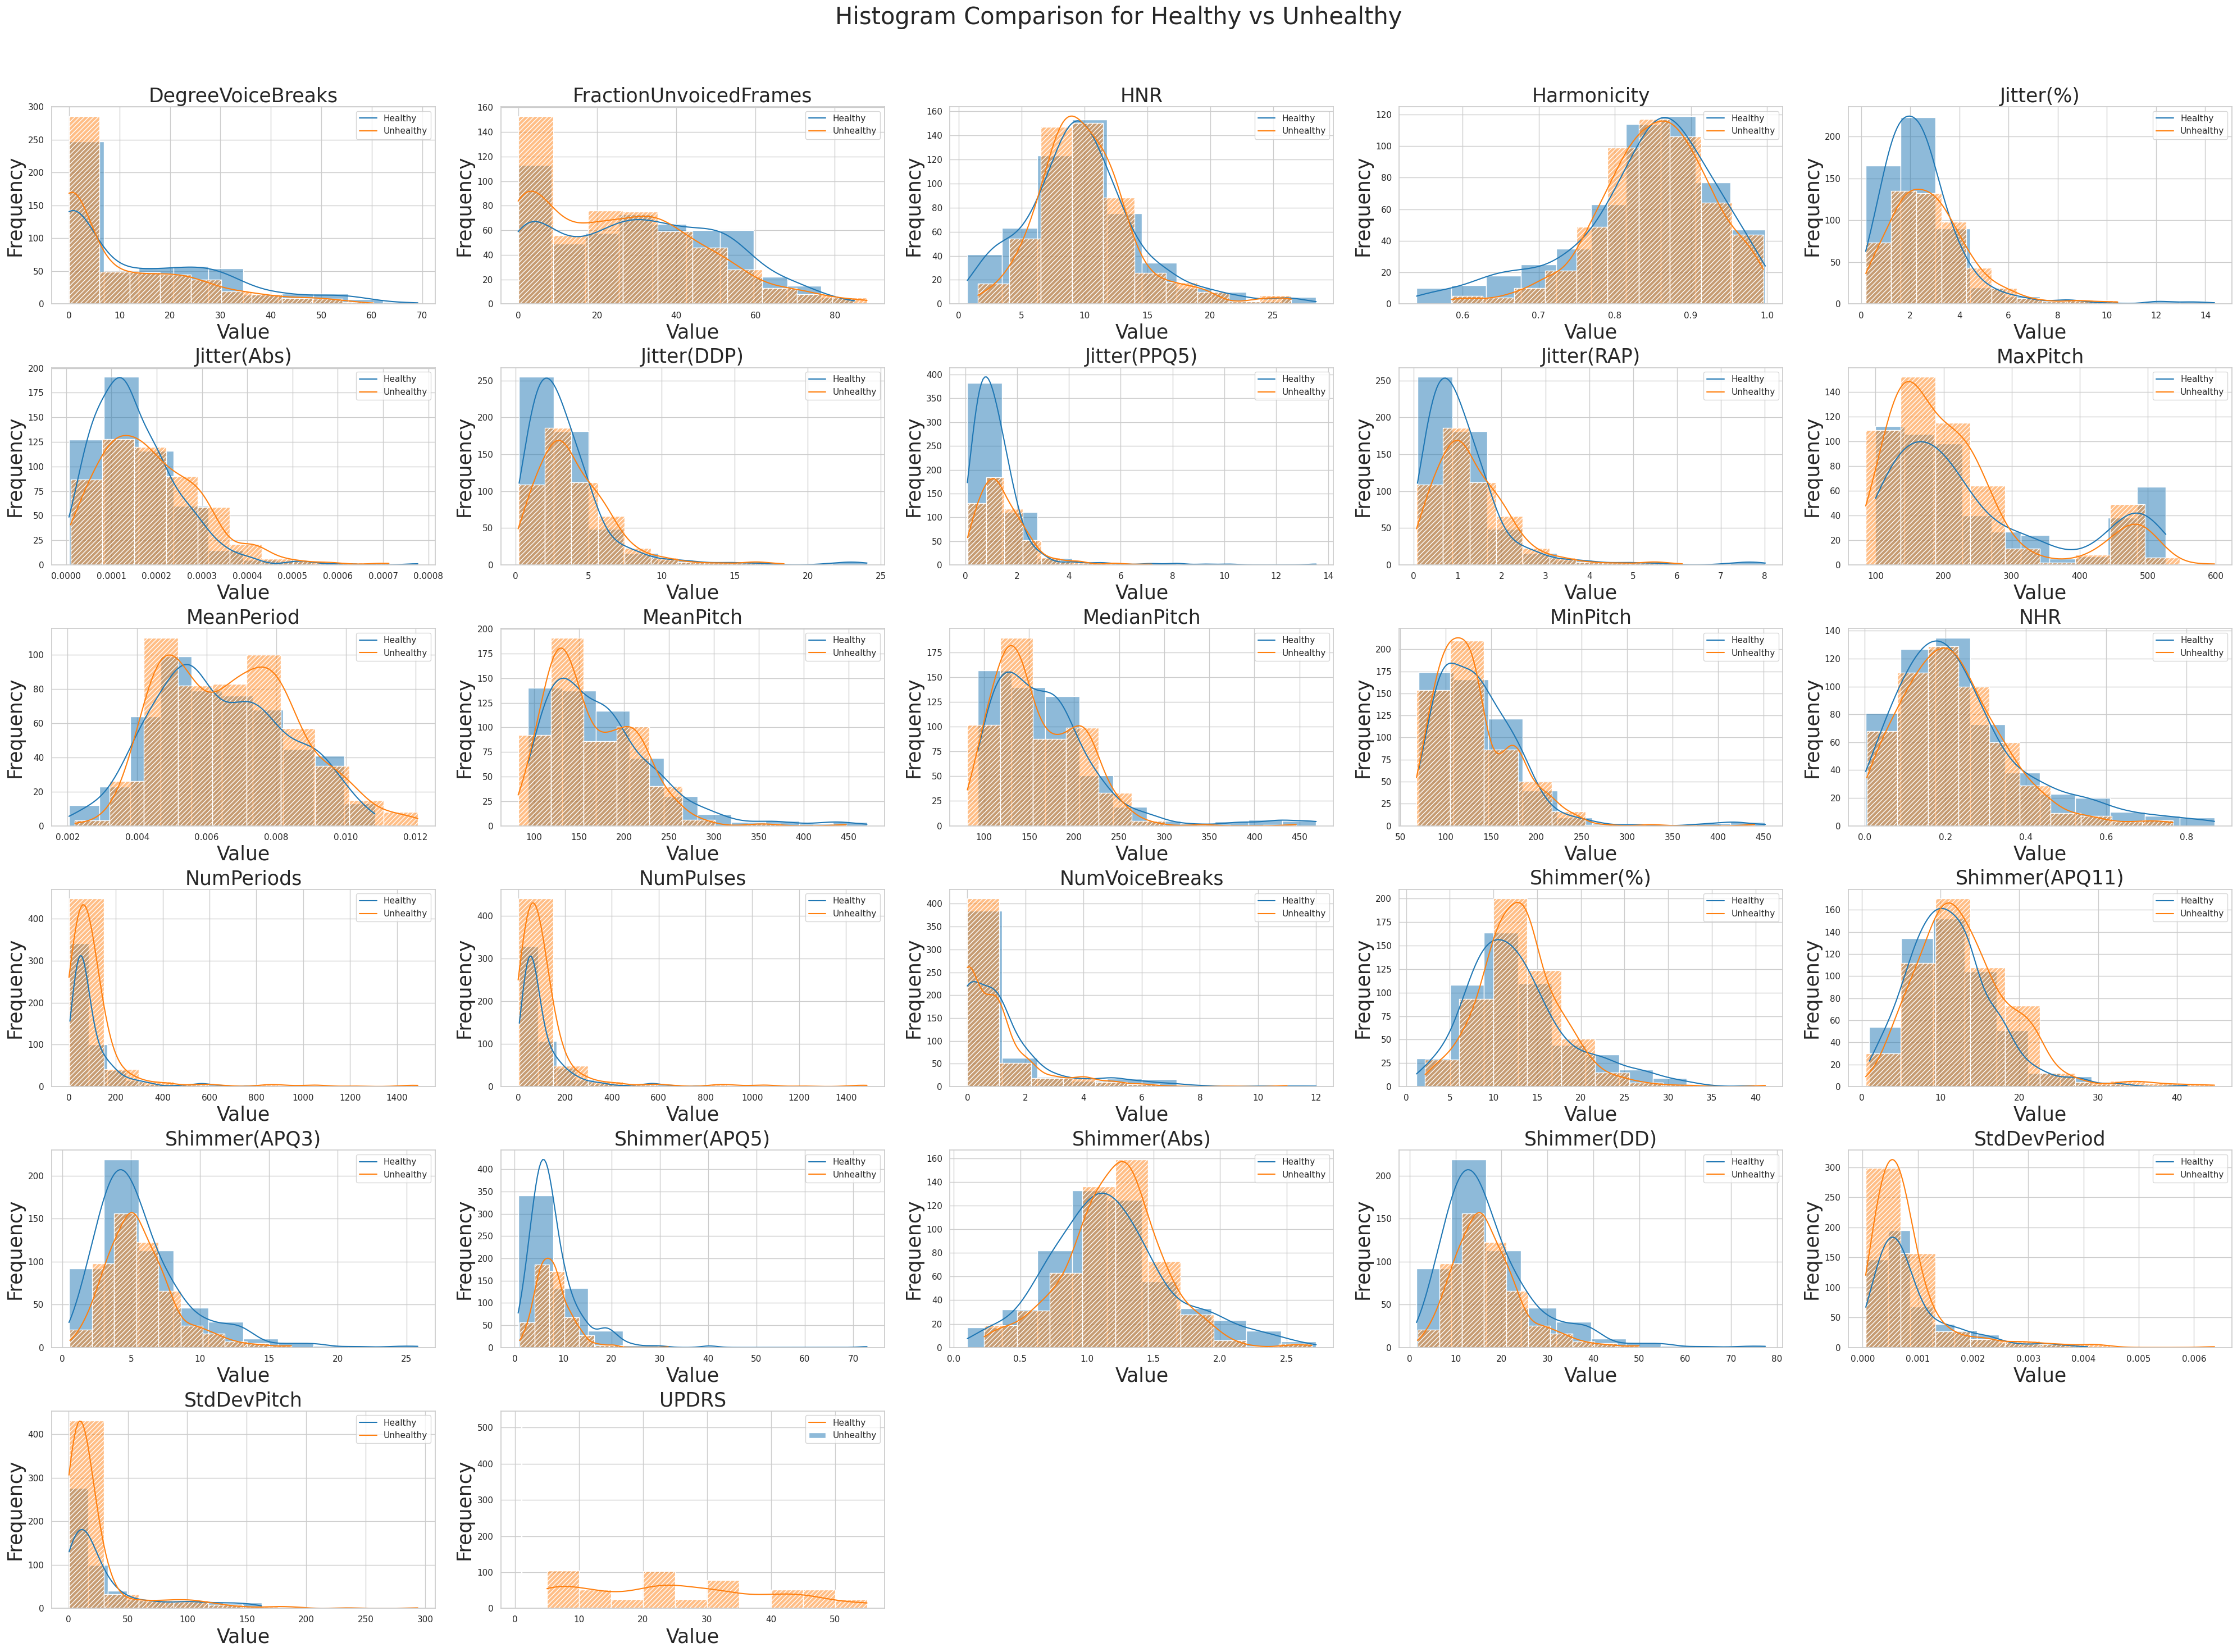

In [8]:
#Histograpm Plotting

import matplotlib.pyplot as plt
import seaborn as sns
# Select numeric columns for histograms
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Exclude specific columns
columns_to_exclude = ["Subject_ID", "PD Indicator"]
numeric_columns = numeric_columns.difference(columns_to_exclude)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Define custom color palette for histograms
custom_color_palette = sns.color_palette(["#1f77b4", "#ff7f0e"])  # Blue and orange

# Define hatch patterns for healthy and unhealthy individuals
hatch_patterns = ["", "////"]  # No hatch for healthy, hatch for unhealthy

# Function to plot side-by-side histograms with hatch patterns
def plot_side_by_side_histograms(dataframe1, dataframe2, title):
    plt.figure(figsize=(40, 30))
    for i, column in enumerate(numeric_columns, start=1):
        plt.subplot(6, 5, i)
        sns.histplot(dataframe1[column], bins=10, kde=True, color=custom_color_palette[0], hatch=hatch_patterns[0])
        sns.histplot(dataframe2[column], bins=10, kde=True, color=custom_color_palette[1], hatch=hatch_patterns[1])
        plt.title(column, fontsize=25)  # Set individual histogram title font size
        plt.xlabel("Value", fontsize=25)
        plt.ylabel("Frequency", fontsize=25)
        plt.legend(labels=["Healthy", "Unhealthy"])

    plt.tight_layout()
    plt.suptitle(f"Histogram Comparison for {title}", fontsize=30)
    plt.subplots_adjust(top=0.92)
    plt.show()

# Plot side-by-side histograms for df1 (healthy) and df2 (unhealthy)
plot_side_by_side_histograms(df1, df2, "Healthy vs Unhealthy")

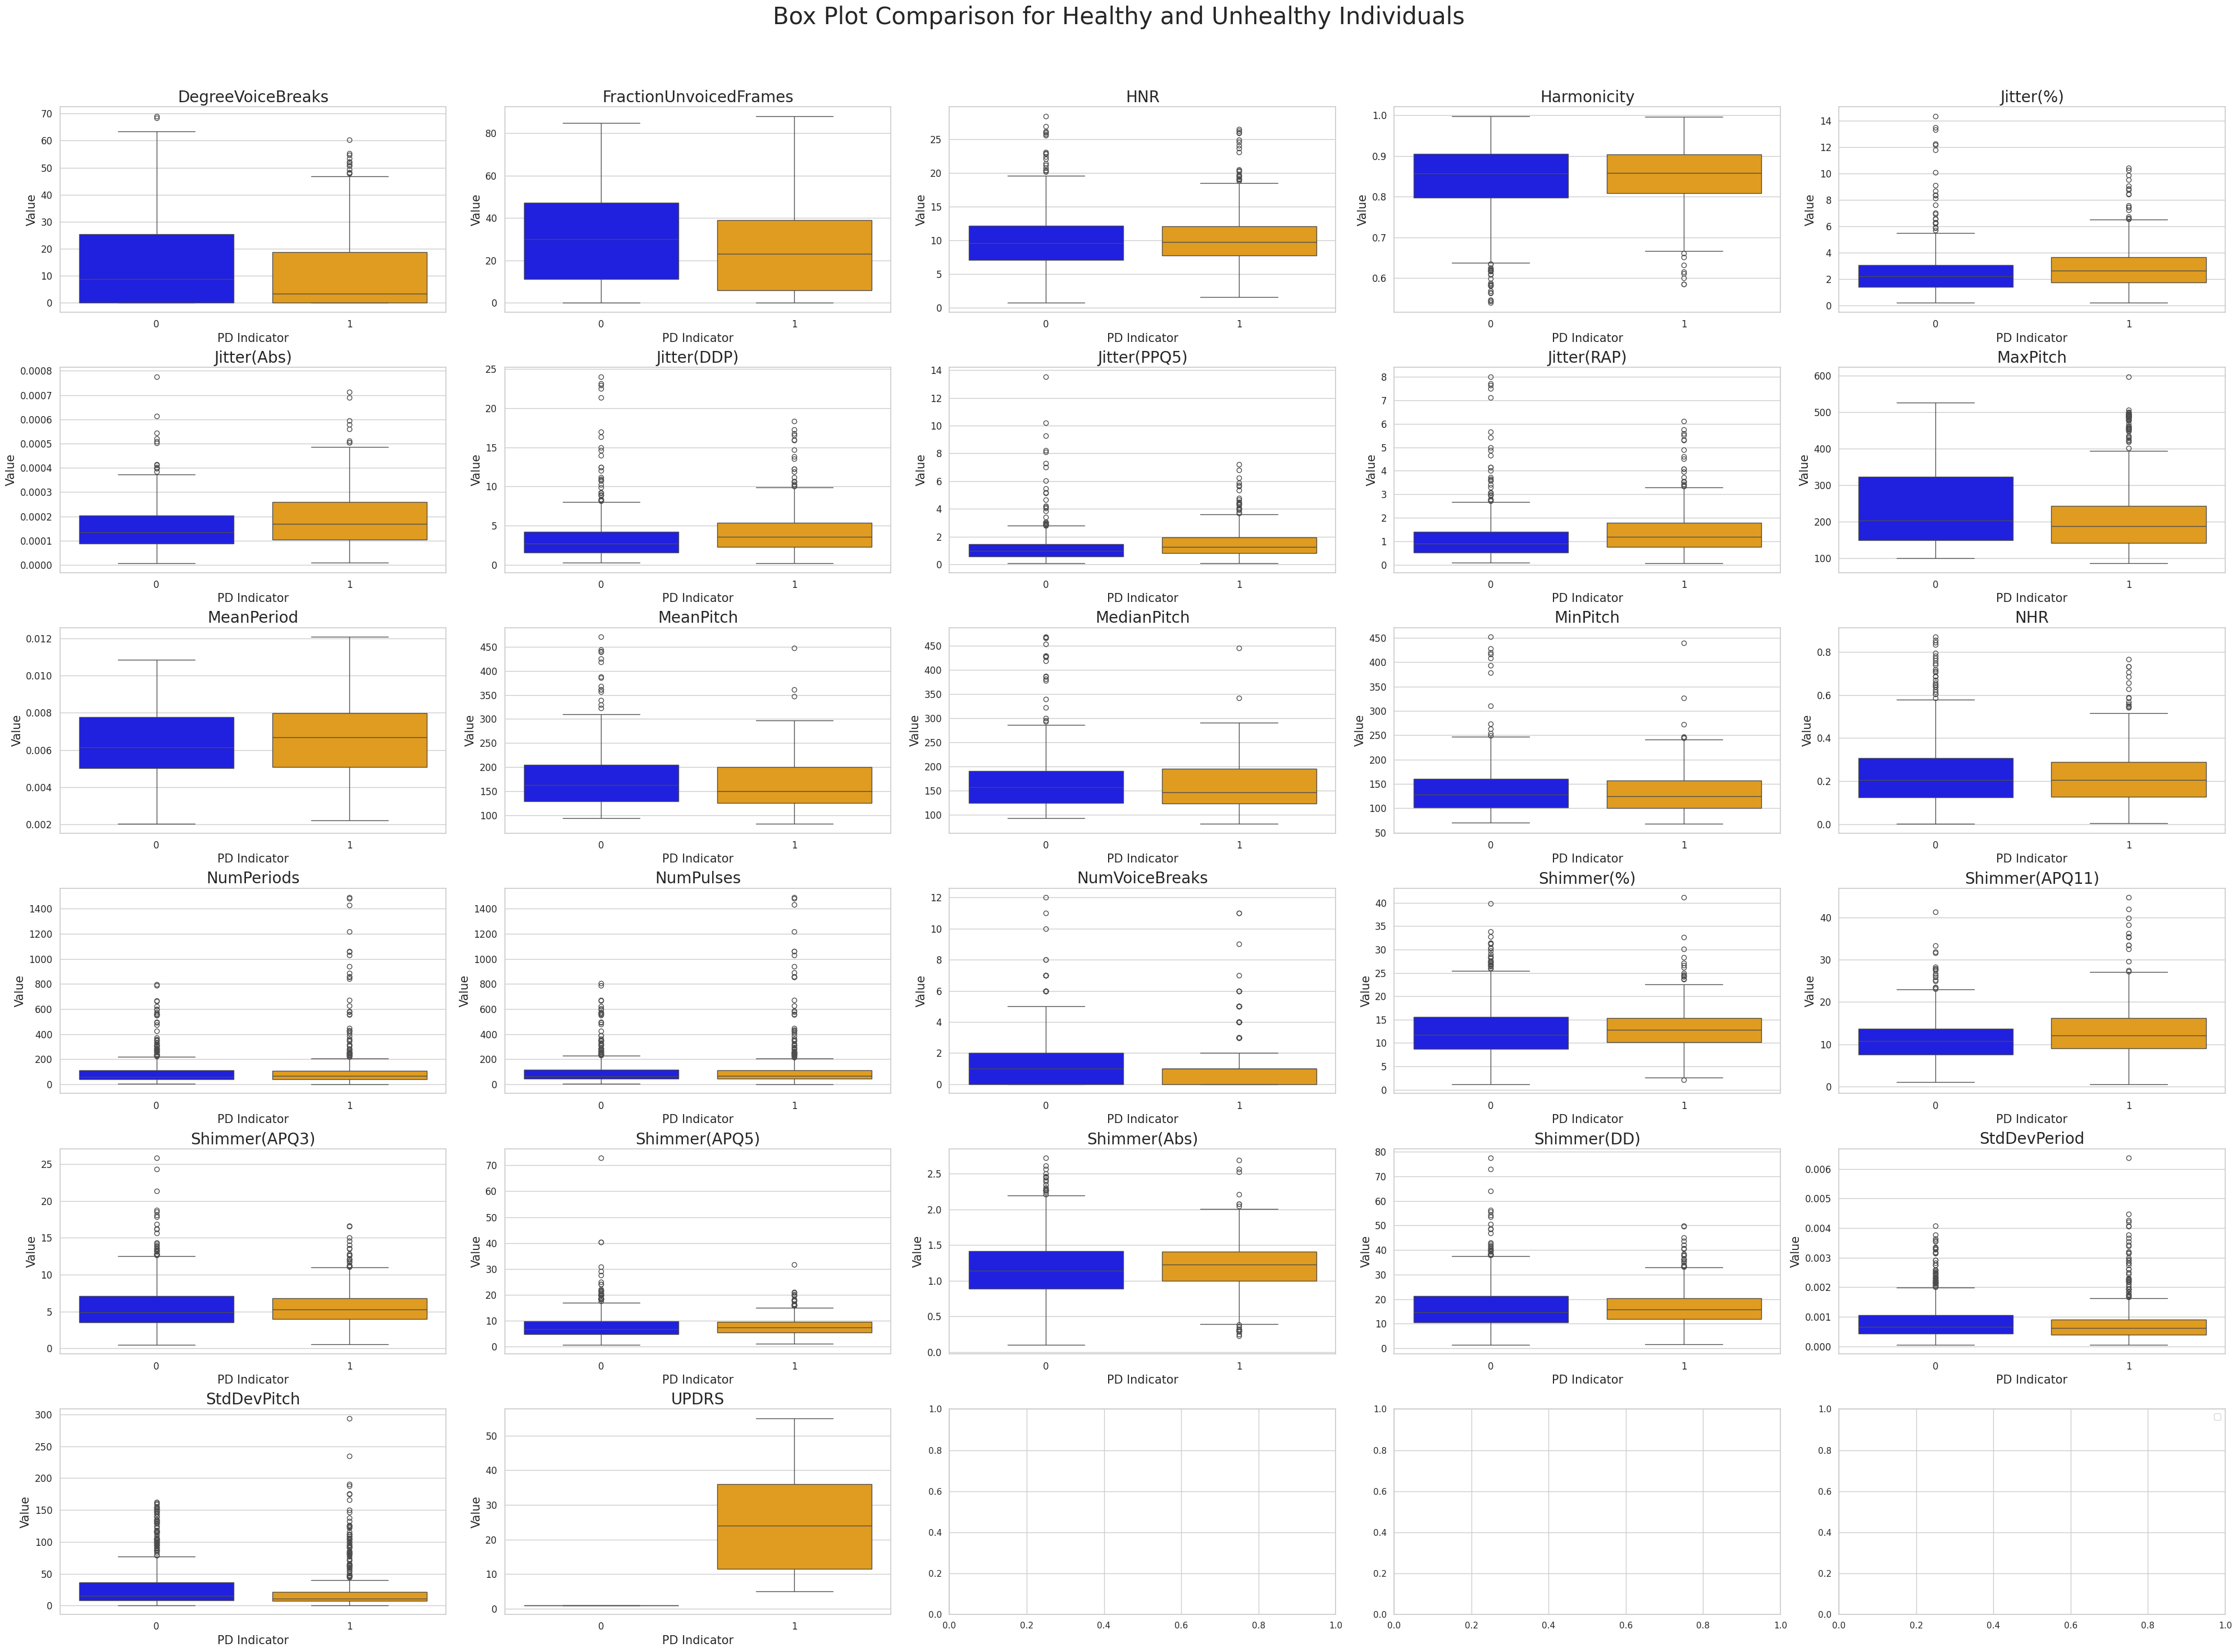

In [9]:
#Box Plotting

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Exclude specific columns
columns_to_exclude = ["Subject_ID", "PD Indicator"]
numeric_columns = numeric_columns.difference(columns_to_exclude)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a 6 by 5 grid of axes for the box plots
fig, axes = plt.subplots(6, 5, figsize=(40, 30))
axes = axes.flatten()

# Create a box plot for each numeric column in df1 and df2
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df1, x="PD Indicator", y=column, ax=axes[i], color="blue")
    sns.boxplot(data=df2, x="PD Indicator", y=column, ax=axes[i], color="orange")

    # Add hatches for the boxes
    for patch in axes[i].artists:
        patch.set_hatch('//')

    axes[i].set_title(column, fontsize=20)
    axes[i].set_xlabel("PD Indicator", fontsize=15)
    axes[i].set_ylabel("Value", fontsize=15)
    axes[i].tick_params(axis="both", labelsize=12)

plt.tight_layout()
plt.suptitle("Box Plot Comparison for Healthy and Unhealthy Individuals", fontsize=30)
plt.subplots_adjust(top=0.92)
plt.legend(labels=["Healthy", "Unhealthy"])
plt.show()

In [10]:
#Confidence Interval

import pandas as pd
import numpy as np
from scipy.stats import t
# List of features/columns in your dataset
features = df1.columns.difference(["Subject_ID", "PD Indicator"])

# Initialize empty lists to store results
selected_features = []
mean_differences = []
confidence_intervals = []
absolute_mean_differences = []  # New list to store absolute mean differences

# Loop through each feature
for feature in features:
    # Calculate mean and standard error for each group
    mean_healthy = df1[feature].mean()
    mean_unhealthy = df2[feature].mean()
    std_error_healthy = df1[feature].std() / np.sqrt(len(df1))
    std_error_unhealthy = df2[feature].std() / np.sqrt(len(df2))

    # Calculate the t-statistic
    t_statistic = (mean_unhealthy - mean_healthy) / np.sqrt(std_error_healthy**2 + std_error_unhealthy**2)

    # Calculate degrees of freedom for the t-distribution
    dof = len(df1) + len(df2) - 2

    # Calculate the critical value for the t-distribution
    t_critical = t.ppf(0.975, dof)  # 95% confidence level

    # Calculate the margin of error
    margin_of_error = t_critical * np.sqrt((std_error_healthy**2 + std_error_unhealthy**2) / 2)

    # Calculate the confidence interval
    ci_lower = (mean_unhealthy - mean_healthy) - margin_of_error
    ci_upper = (mean_unhealthy - mean_healthy) + margin_of_error

    # Check if confidence intervals do not overlap
    if ci_lower > 0 or ci_upper < 0:
        selected_features.append(feature)
        mean_difference = mean_unhealthy - mean_healthy
        mean_differences.append(mean_difference)
        confidence_intervals.append((ci_lower, ci_upper))
        absolute_mean_differences.append(abs(mean_difference))  # Add the absolute mean difference

# Create a DataFrame to store the results
feature_selection_results = pd.DataFrame({
    'Feature': selected_features,
    'Mean Difference': mean_differences,
    'Confidence Interval': confidence_intervals,
    'Absolute Mean Difference': absolute_mean_differences  # Add the absolute mean difference column
})

# Sort features based on larger absolute mean differences and narrower CIs
sorted_results = feature_selection_results.sort_values(by=['Absolute Mean Difference', 'Confidence Interval'], ascending=[False, True])

# Drop the "Absolute Mean Difference" column
sorted_results = sorted_results.drop(columns='Absolute Mean Difference')

# Print the sorted results with formatting
pd.options.display.float_format = '{:.3f}'.format
print(sorted_results.to_string(index=False))


# Define the file path where you want to save the top 10 results
output_file_path = 'sorted_results.csv'

# Save the top 10 rows of the sorted results to a CSV file
top_10_sorted_results = sorted_results.head(10)
top_10_sorted_results.to_csv(output_file_path, index=False)

print("Top 10 results saved to", output_file_path)

               Feature  Mean Difference                               Confidence Interval
              MaxPitch          -33.810         (-44.17996795243056, -23.440980175626297)
                 UPDRS           24.004          (23.105359296668126, 24.902347832426287)
            NumPeriods           13.981           (1.114176699358996, 26.847035691333172)
             MeanPitch          -11.558         (-16.354371508950656, -6.761692949327118)
           MedianPitch           -9.447         (-14.256260205293819, -4.638066287962426)
           StdDevPitch           -8.852         (-11.987994936130853, -5.715006667544863)
              MinPitch           -5.580          (-9.627504098689435, -1.532719757839339)
FractionUnvoicedFrames           -5.069         (-6.861681929109735, -3.2761927188819593)
     DegreeVoiceBreaks           -3.803         (-5.099021178822458, -2.5077541139002335)
        Shimmer(APQ11)            1.772          (1.2592897573566089, 2.2846059705982564)
          

In [11]:
#Hypothesis Testing

import numpy as np
from scipy.stats import norm
# List of features/columns in your dataset
features = df1.columns.difference(["Subject_ID", "PD Indicator"])
# Set the significance level
alpha = 0.05
# Initialize empty lists to store results
reject_results = []
fail_to_reject_results = []
# Loop through each feature
for feature in features:
    # Calculate sample means and standard deviations
    mean_healthy = df1[feature].mean()
    mean_unhealthy = df2[feature].mean()
    std_healthy = df1[feature].std()
    std_unhealthy = df2[feature].std()
    n_healthy = len(df1)
    n_unhealthy = len(df2)
    # Calculate the pooled standard error
    pooled_std = np.sqrt((std_healthy**2 / n_healthy) + (std_unhealthy**2 / n_unhealthy))
    # Calculate the z-score
    z_score = (mean_unhealthy - mean_healthy) / pooled_std
    # Calculate the critical z-value for two-tailed test
    critical_z = norm.ppf(1 - alpha / 2)
    # Perform the hypothesis test
    result_dict = {
        "Feature": feature,
        "Z-Score": z_score,
        "Critical Z-Value": critical_z,
        "Result": "Reject H0" if np.abs(z_score) > critical_z else "Fail to reject H0"
    }
    # Store the results in the appropriate list
    if result_dict["Result"] == "Reject H0":
        reject_results.append(result_dict)
    else:
        fail_to_reject_results.append(result_dict)
# Create DataFrames for the results
reject_results_df = pd.DataFrame(reject_results)
fail_to_reject_results_df = pd.DataFrame(fail_to_reject_results)

# Display the results for "Reject H0"
print("Reject H0:")
print(reject_results_df)

# Display the results for "Fail to reject H0"
print("\nFail to reject H0:")
print(fail_to_reject_results_df)


# Create DataFrames for the results
reject_results_df = pd.DataFrame(reject_results)
fail_to_reject_results_df = pd.DataFrame(fail_to_reject_results)

# Define the file paths for saving the results
reject_output_file_path = 'reject_results.csv'
fail_to_reject_output_file_path = 'fail_to_reject_results.csv'

# Save the results to CSV files
reject_results_df.to_csv(reject_output_file_path, index=False)
fail_to_reject_results_df.to_csv(fail_to_reject_output_file_path, index=False)

print("Rejected results saved to", reject_output_file_path)

Reject H0:
                   Feature  Z-Score  Critical Z-Value     Result
0        DegreeVoiceBreaks   -4.073             1.960  Reject H0
1   FractionUnvoicedFrames   -3.923             1.960  Reject H0
2              Harmonicity    2.601             1.960  Reject H0
3                Jitter(%)    3.180             1.960  Reject H0
4              Jitter(Abs)    5.482             1.960  Reject H0
5              Jitter(DDP)    3.615             1.960  Reject H0
6             Jitter(PPQ5)    3.613             1.960  Reject H0
7              Jitter(RAP)    3.615             1.960  Reject H0
8                 MaxPitch   -4.524             1.960  Reject H0
9               MeanPeriod    2.651             1.960  Reject H0
10               MeanPitch   -3.344             1.960  Reject H0
11             MedianPitch   -2.726             1.960  Reject H0
12                     NHR   -2.436             1.960  Reject H0
13          NumVoiceBreaks   -2.559             1.960  Reject H0
14          Sh

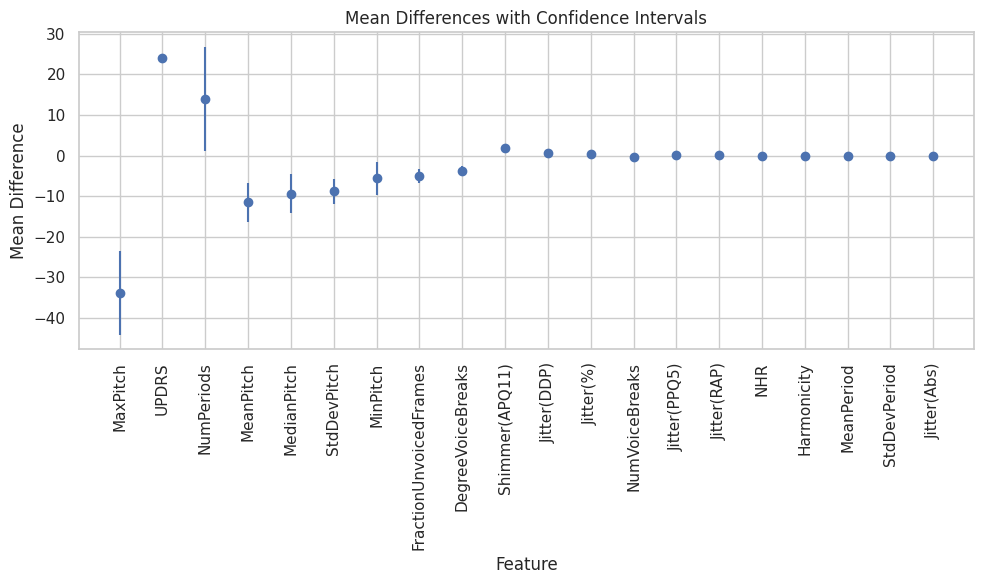

In [12]:
#Plot of confidence Interval and Mean differences

import matplotlib.pyplot as plt
# Extract confidence interval lower and upper bounds
sorted_results['CI_Lower'] = sorted_results['Confidence Interval'].apply(lambda x: x[0])
sorted_results['CI_Upper'] = sorted_results['Confidence Interval'].apply(lambda x: x[1])

# Plot mean differences with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(sorted_results['Feature'], sorted_results['Mean Difference'], yerr=[sorted_results['Mean Difference'] - sorted_results['CI_Lower'], sorted_results['CI_Upper'] - sorted_results['Mean Difference']], fmt='o')
plt.xlabel('Feature')
plt.ylabel('Mean Difference')
plt.title('Mean Differences with Confidence Intervals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
#Saving the data for Null Hypothesis and sorted mean differences

df3 = pd.read_csv('./reject_results.csv')
df4 = pd.read_csv('./sorted_results.csv')
common_features = np.intersect1d(df3['Feature'], df4['Feature'])
print("Common features:")
print(common_features)

selected_df1 = df1[common_features]
selected_df2 = df2[common_features]
common_features

Common features:
['DegreeVoiceBreaks' 'FractionUnvoicedFrames' 'MaxPitch' 'MeanPitch'
 'MedianPitch' 'Shimmer(APQ11)' 'StdDevPitch' 'UPDRS']


array(['DegreeVoiceBreaks', 'FractionUnvoicedFrames', 'MaxPitch',
       'MeanPitch', 'MedianPitch', 'Shimmer(APQ11)', 'StdDevPitch',
       'UPDRS'], dtype=object)

# ***Random Forest***

In [14]:
# import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [15]:
#load the dataset

df = pd.read_csv('/content/voice_data.txt')

# OR — if you already have the renamed version, skip to step 3
# If not, rename columns again for clarity:
df.columns = [
    "Subject_ID", "Jitter(%)", "Jitter(Abs)", "Jitter(RAP)", "Jitter(PPQ5)",
    "Jitter(DDP)", "Shimmer(%)", "Shimmer(Abs)", "Shimmer(APQ3)", "Shimmer(APQ5)",
    "Shimmer(APQ11)", "Shimmer(DD)", "Harmonicity", "NHR", "HNR",
    "MedianPitch", "MeanPitch", "StdDevPitch", "MinPitch", "MaxPitch",
    "NumPulses", "NumPeriods", "MeanPeriod", "StdDevPeriod",
    "FractionUnvoicedFrames", "NumVoiceBreaks", "DegreeVoiceBreaks",
    "UPDRS", "PD Indicator"
]

print("Data Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

Data Loaded Successfully!
Shape: (1039, 29)
   Subject_ID  Jitter(%)  Jitter(Abs)  Jitter(RAP)  Jitter(PPQ5)  Jitter(DDP)  \
0           1      0.728        0.000        0.353         0.376        1.059   
1           1      1.220        0.000        0.732         0.670        2.196   
2           1      2.502        0.000        1.156         1.634        3.469   
3           1      3.509        0.000        1.715         1.539        5.145   
4           1      2.470        0.000        1.358         1.341        4.075   

   Shimmer(%)  Shimmer(Abs)  Shimmer(APQ3)  Shimmer(APQ5)  ...  MaxPitch  \
0       5.864         0.642          2.058          3.180  ...   234.505   
1       8.719         0.875          4.347          5.166  ...   211.442   
2      13.513         1.273          5.263          8.771  ...   220.230   
3       9.112         1.040          3.102          4.927  ...   225.162   
4      10.696         1.256          5.262          7.076  ...   202.812   

   NumPulses

In [16]:
#feature & target split

'''X = df.drop(columns=["Subject_ID", "PD Indicator"])
y = df["PD Indicator"]'''

# Drop UPDRS column (clinical label)
X = df.drop(columns=["Subject_ID", "PD Indicator", "UPDRS"])
y = df["PD Indicator"]


In [17]:
#train test split (80-20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Samples: {X_train.shape[0]} | Testing Samples: {X_test.shape[0]}")

Training Samples: 831 | Testing Samples: 208


In [18]:
#scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***testing diff models parameters to find best params***

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import time

results = []  # to store performance results

def evaluate_model(model_name, params, model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    runtime = end - start
    results.append({
        "Model": model_name,
        **params,
        "Accuracy": acc,
        "Runtime (s)": round(runtime, 2)
    })
    print(f"{model_name} -> Accuracy: {acc:.4f}, Time: {runtime:.2f}s")


In [20]:
#vary n_estimators

for n in [100, 200, 300]:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced'
    )
    evaluate_model("RF_n_estimators", {"n_estimators": n}, rf, X_train_scaled, y_train, X_test_scaled, y_test)


RF_n_estimators -> Accuracy: 0.7163, Time: 0.52s
RF_n_estimators -> Accuracy: 0.6971, Time: 0.97s
RF_n_estimators -> Accuracy: 0.6971, Time: 1.44s


In [21]:
#vary max_depth

for d in [5, 8, 10, None]:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=d,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced'
    )
    evaluate_model("RF_max_depth", {"max_depth": d}, rf, X_train_scaled, y_train, X_test_scaled, y_test)


RF_max_depth -> Accuracy: 0.7019, Time: 0.79s
RF_max_depth -> Accuracy: 0.6971, Time: 0.97s
RF_max_depth -> Accuracy: 0.7067, Time: 1.29s
RF_max_depth -> Accuracy: 0.7308, Time: 1.64s


In [22]:
#vary min_samples_split

for s in [2, 5, 10]:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=s,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced'
    )
    evaluate_model("RF_min_samples_split", {"min_samples_split": s}, rf, X_train_scaled, y_train, X_test_scaled, y_test)


RF_min_samples_split -> Accuracy: 0.7019, Time: 1.04s
RF_min_samples_split -> Accuracy: 0.6971, Time: 0.96s
RF_min_samples_split -> Accuracy: 0.7212, Time: 0.96s


In [23]:
#vary min_samples_leaf

for l in [1, 2, 4]:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=l,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced'
    )
    evaluate_model("RF_min_samples_leaf", {"min_samples_leaf": l}, rf, X_train_scaled, y_train, X_test_scaled, y_test)


RF_min_samples_leaf -> Accuracy: 0.7115, Time: 0.99s
RF_min_samples_leaf -> Accuracy: 0.6971, Time: 0.97s
RF_min_samples_leaf -> Accuracy: 0.7212, Time: 0.94s


In [24]:
#vary max_features

for f in ['sqrt', 'log2']:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features=f,
        random_state=42,
        class_weight='balanced'
    )
    evaluate_model("RF_max_features", {"max_features": f}, rf, X_train_scaled, y_train, X_test_scaled, y_test)


RF_max_features -> Accuracy: 0.6971, Time: 0.96s
RF_max_features -> Accuracy: 0.6923, Time: 0.85s


# ***training the best model***

In [25]:
#train the model

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)

print("Random Forest Model Trained Successfully!")

Random Forest Model Trained Successfully!


In [26]:
#prediction

y_pred = rf.predict(X_test_scaled)

In [27]:
#evaluation

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPerformance Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'PD']))



Performance Metrics:
Accuracy: 0.7163
Precision: 0.7027
Recall: 0.7500
F1 Score: 0.7256

Detailed Classification Report:
              precision    recall  f1-score   support

     Healthy       0.73      0.68      0.71       104
          PD       0.70      0.75      0.73       104

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208



In [28]:
#cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", scores)
print("Mean CV Accuracy:", np.mean(scores))

Cross-validation Accuracy: [0.7005988  0.72289157 0.6746988  0.60843373 0.69277108]
Mean CV Accuracy: 0.6798787966236203


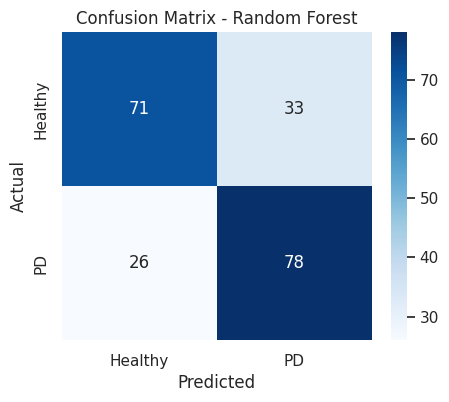

In [29]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'PD'], yticklabels=['Healthy', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

/tmp/ipython-input-1785650742.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


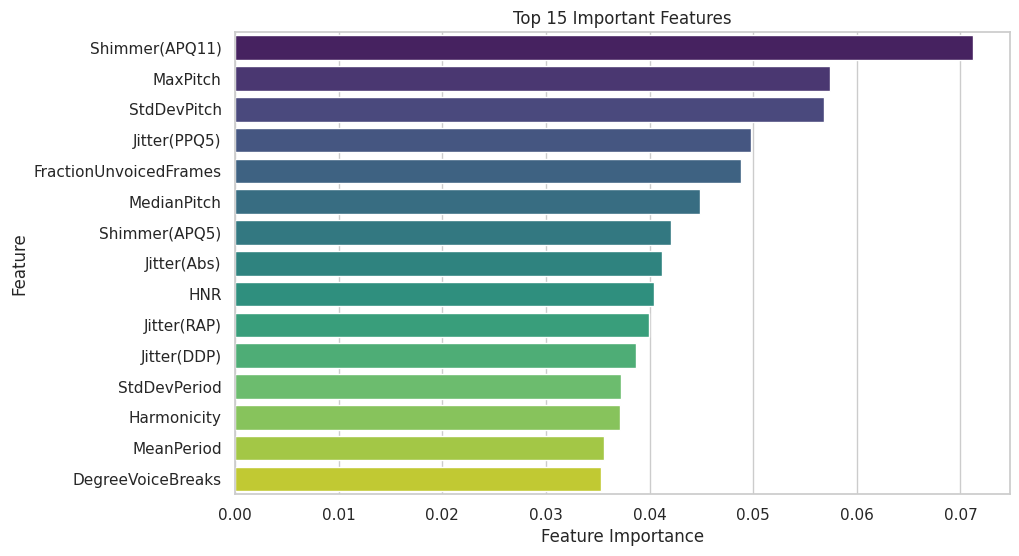

'\nimportances = rf.feature_importances_\nfeat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)\nprint(feat_imp.head(10))'

In [30]:
#feature importance plot

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.title('Top 15 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

'''
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_imp.head(10))'''


# ***Without Dropping UPDRS***

In [31]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [32]:
#load dataset

df = pd.read_csv('/content/voice_data.txt')

df.columns = [
    "Subject_ID", "Jitter(%)", "Jitter(Abs)", "Jitter(RAP)", "Jitter(PPQ5)",
    "Jitter(DDP)", "Shimmer(%)", "Shimmer(Abs)", "Shimmer(APQ3)", "Shimmer(APQ5)",
    "Shimmer(APQ11)", "Shimmer(DD)", "Harmonicity", "NHR", "HNR",
    "MedianPitch", "MeanPitch", "StdDevPitch", "MinPitch", "MaxPitch",
    "NumPulses", "NumPeriods", "MeanPeriod", "StdDevPeriod",
    "FractionUnvoicedFrames", "NumVoiceBreaks", "DegreeVoiceBreaks",
    "UPDRS", "PD Indicator"
]

print("Data Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

Data Loaded Successfully!
Shape: (1039, 29)
   Subject_ID  Jitter(%)  Jitter(Abs)  Jitter(RAP)  Jitter(PPQ5)  Jitter(DDP)  \
0           1      0.728        0.000        0.353         0.376        1.059   
1           1      1.220        0.000        0.732         0.670        2.196   
2           1      2.502        0.000        1.156         1.634        3.469   
3           1      3.509        0.000        1.715         1.539        5.145   
4           1      2.470        0.000        1.358         1.341        4.075   

   Shimmer(%)  Shimmer(Abs)  Shimmer(APQ3)  Shimmer(APQ5)  ...  MaxPitch  \
0       5.864         0.642          2.058          3.180  ...   234.505   
1       8.719         0.875          4.347          5.166  ...   211.442   
2      13.513         1.273          5.263          8.771  ...   220.230   
3       9.112         1.040          3.102          4.927  ...   225.162   
4      10.696         1.256          5.262          7.076  ...   202.812   

   NumPulses

In [33]:
#feature and target split

X = df.drop(columns=["Subject_ID", "PD Indicator"])
y = df["PD Indicator"]

In [34]:
#train test split (80-20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Samples: {X_train.shape[0]} | Testing Samples: {X_test.shape[0]}")

Training Samples: 831 | Testing Samples: 208


In [35]:
#scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#training

rf = RandomForestClassifier(
    n_estimators=200,         # number of trees
    max_depth=10,             # control overfitting
    min_samples_split=5,
    random_state=42,
    class_weight='balanced'   # handle any imbalance
)

rf.fit(X_train_scaled, y_train)
print("Random Forest Model Trained Successfully!")

Random Forest Model Trained Successfully!


In [37]:
#prdictions

y_pred = rf.predict(X_test_scaled)

In [38]:
#evaluation

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPerformance Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'PD']))


Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Detailed Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       104
          PD       1.00      1.00      1.00       104

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



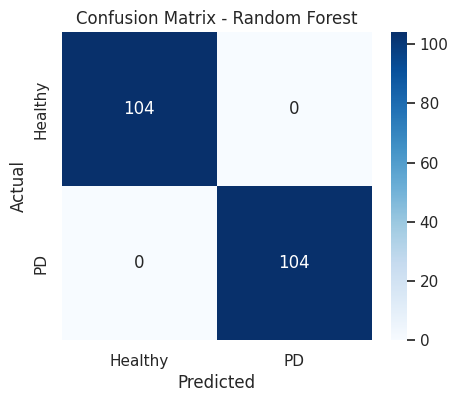

In [39]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'PD'], yticklabels=['Healthy', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

/tmp/ipython-input-2364895792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


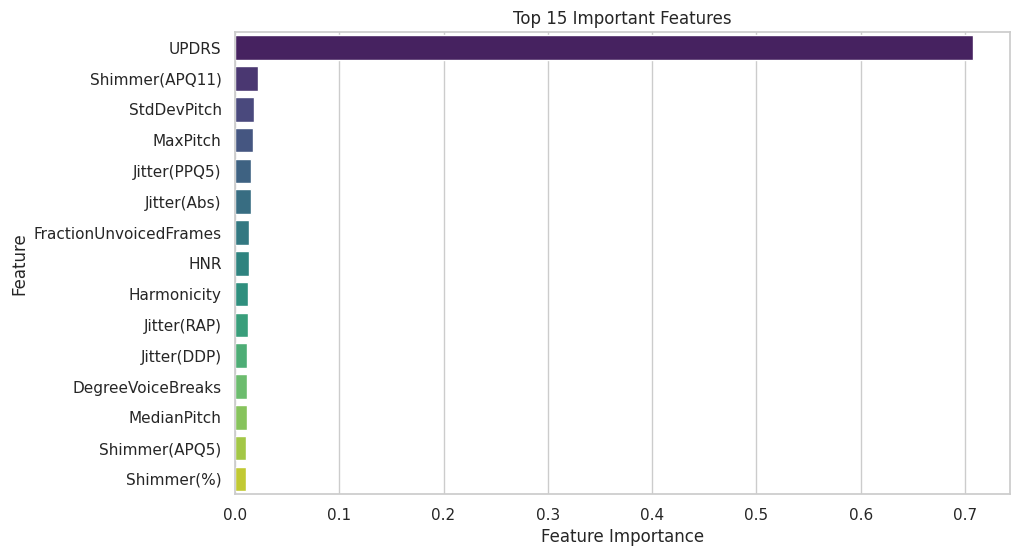

In [40]:
#feature importance plot

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.title('Top 15 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()